In [1]:
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
import itertools 
from statsmodels.stats.multitest import fdrcorrection

import matplotlib.pyplot as plt
import numpy as np

from diffupy.views import box_plot_from_dict

ModuleNotFoundError: No module named 'diffupy.views'

In [3]:
import json

    
with open('metrics_set1_genes.txt', 'r') as outfile:  
    metrics_genes = json.load(outfile)

with open('metrics_set1_metabolites.txt', 'r') as outfile:  
    metrics_metabolites = json.load(outfile)
    
with open('metrics_set1_by_entity.txt', 'r') as outfile:  
    metrics_set1_by_entity = json.load(outfile)
    
    
with open('metrics_set2_by_entity.txt', 'r') as outfile:  
    metrics_set2_by_entity = json.load(outfile)
    
with open('metrics_set3_by_entity.txt', 'r') as outfile:  
    metrics_set3_by_entity = json.load(outfile)
    

In [4]:
metrics_set1_by_entity['auroc_metrics_by_entity'].pop('micrornas')
metrics_set1_by_entity['auprc_metrics_by_entity'].pop('micrornas')

[0.0024510189301630357,
 0.012315337500307253,
 0.009529641670676013,
 0.0023361638839828544]

In [5]:
metrics_set1_by_entity

{'auroc_metrics_by_entity': {'genes': [0.9603418004682791,
   0.9589842064018517,
   0.9595750141005743,
   0.9591372278716472],
  'metabolite': [0.7947754885699533,
   0.9041434204694475,
   0.8090521948522523,
   0.7071321846170717]},
 'auprc_metrics_by_entity': {'genes': [0.23967052635018396,
   0.23587598990646844,
   0.2371683764533823,
   0.23587934769095667],
  'metabolite': [0.0008574668400439669,
   0.0011331077398774563,
   0.0009183298558147854,
   0.000731213173756565]}}

In [6]:
metrics_set1_by_entity_subnet = {'auroc_metrics_subnet':{'genes':metrics_genes['auroc_metrics_by_method']['z'], 
                                                         'metabolite':metrics_metabolites['auroc_metrics_by_method']['z'] 
                                                        },
                                 
                                 'auprc_metrics_subnet':{'genes':metrics_genes['auprc_metrics_by_method']['z'],
                                                         'metabolite':metrics_metabolites['auprc_metrics_by_method']['z'] 
                                                        }
                                }




In [7]:
metrics_set1_by_entity_subnet

{'auroc_metrics_subnet': {'genes': [0.7154495986457906,
   0.7068669248392863,
   0.7186088940316678,
   0.713923972319684],
  'metabolite': [0.5103019761144784,
   0.549289292161293,
   0.6797122499970114,
   0.5859364726416335]},
 'auprc_metrics_subnet': {'genes': [0.05204047879742931,
   0.05097810521769736,
   0.05310842425987059,
   0.05293633303566878],
  'metabolite': [0.0030597084367979923,
   0.009000555075299347,
   0.01023310071220225,
   0.006647504831542104]}}

## FDR p-values

In [8]:
def get_p_values(metrics):
    p_values = {}

    result_list = map(dict, itertools.combinations(
        metrics.items(), 2))


    for ch in result_list:
        values = list(ch.values())
        ttest = stats.ttest_rel(a=values[0], b=values[1])
        p_values[str(tuple(ch.keys()))] = ttest.pvalue   
        
    return p_values

def get_p_values_multiple(metrics):
    p_values = {}
    
    print(metrics)
    
    for k, v in metrics[0].items():
        ttest = stats.ttest_rel(a=v,b=metrics[1][k])
        p_values[str(k)] = ttest.pvalue
        
    return p_values

In [9]:

def get_normalized_p_values(p_values):
    normalized_p_values = {}
    
    fdr = fdrcorrection(list(p_values.values()), alpha=0.05, method='indep', is_sorted=False)
    
    for k1, k2 in enumerate(p_values.keys()):
        normalized_p_values[k2] = -math.log10(fdr[1][k1])
    
    return normalized_p_values
        

In [10]:
def fdr_plot(metrics, p_values_func, title):
    p_values = p_values_func(metrics)
    normalized_p_values = get_normalized_p_values(p_values)
    
    x = np.array(list(normalized_p_values.keys()))
    y = np.array(list(normalized_p_values.values()))


    markerline, stemlines, baseline = plt.stem(
        x, y, linefmt='grey', markerfmt='D', bottom=-math.log10(0.05), use_line_collection=True)

    plt.rcParams["figure.figsize"] = (10, 5)
    plt.xlabel(title)
    plt.ylabel("normalized FDR p-value")

    plt.xticks(ha='left', rotation=-45)
    plt.show()

In [27]:
def fdr_three_plot(metrics, p_values_func, title):
    normalized_p_values = []
    
    for metric in metrics:    
        p_values = p_values_func(metric)
        normalized_p_values.append(list(get_normalized_p_values(p_values).values()))
        x = list(p_values.keys())
        
    
    markerline, stemlines, baseline = plt.stem(
        x, normalized_p_values[0], linefmt='forestgreen', markerfmt='gd', bottom=-math.log10(0.05), use_line_collection=True, label = 'Dataset 1')
    markerline, stemlines, baseline = plt.stem(
        x, normalized_p_values[1], linefmt='tomato', markerfmt='ro', bottom=-math.log10(0.05), use_line_collection=True, label = 'Dataset 2')
    markerline, stemlines, baseline = plt.stem(
        x, normalized_p_values[2], linefmt='dodgerblue', markerfmt='bo', bottom=-math.log10(0.05), use_line_collection=True, label = 'Dataset 3')

    
    plt.legend()

    plt.rcParams["figure.figsize"] = (10, 5)
    plt.xlabel(title)
    plt.ylabel("normalized FDR -log10(p-value)")

    plt.xticks(ha='left', rotation=-45)
    plt.show()

In [62]:
def fdr_barchart_three_plot(metrics, p_values_func, title):
    normalized_p_values = []
    
    plt.rcParams.update({'font.size': 17})

    
    for metric in metrics:
        print(metric)
        p_values = p_values_func(metric)
        normalized_p_values.append(list(get_normalized_p_values(p_values).values()))
        x = list(p_values.keys())
        
    
    ind = np.arange(len(x))  # the x locations for the groups
    width = 0.27       # the width of the bars

    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    
    fig.set_size_inches(18.5, 10.5)

    yvals = [4, 9, 2]
    rects1 = ax.bar(ind, normalized_p_values[0], width, color='forestgreen')


    ax.set_ylabel("normalized FDR -log10(p-value)")
    plt.xlabel(title)

    ax.set_xticks(ind+width)
    ax.set_xticklabels(x, ha='left', rotation=-45)
    ax.legend( (rects1[0],), ('Dataset 1') )

    ax.plot([-0.2, 2], [-math.log10(0.05), -math.log10(0.05)], "k--")



    plt.show()
    

## Diffusion over background graph PathMeUniverse vs KEGG 

In [13]:
entity_subnet = [i for k, v in metrics_set1_by_entity_subnet['auroc_metrics_subnet'].items() for i in v]
set1_by_entity = [i for k, v in metrics_set1_by_entity['auroc_metrics_by_entity'].items() for i in v]

In [14]:
import plotly.plotly as py
import plotly.graph_objs as go

x = ['genes', 'genes', 'genes', 'genes',
     'metabolites', 'metabolites', 'metabolites', 'metabolites'
    ]

trace0 = go.Box(
    y=entity_subnet,
    x=x,
    name='Dataset1\nPathMeUniverse subnetwork (only Metabolites or onlyGenes)\n\n',
    marker=dict(
        color='#85eabd'
    )
)
trace1 = go.Box(
    y=set1_by_entity,
    x=x,
    name='Dataset1\nPathMeUniverse\n(Metabolites + Genes + miRNAs)\n\n',
    marker=dict(
        color='#3D9970'
    )
)


data = [trace0, trace1]
layout = go.Layout(
    yaxis=dict(
        title='AUROC',
        zeroline=False
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

/usr/local/lib/python3.7/site-packages/plotly/tools.py:1108: UserWarning:

Looks like you used a newline character: '\n'.

Plotly uses a subset of HTML escape characters
to do things like newline (<br>), bold (<b></b>),
italics (<i></i>), etc. Your newline characters 
have been converted to '<br>' so they will show 
up right on your Plotly figure!

/usr/local/lib/python3.7/site-packages/plotly/tools.py:1108: UserWarning:

Looks like you used a newline character: '\n'.

Plotly uses a subset of HTML escape characters
to do things like newline (<br>), bold (<b></b>),
italics (<i></i>), etc. Your newline characters 
have been converted to '<br>' so they will show 
up right on your Plotly figure!

/usr/local/Cellar/ipython/7.2.0/libexec/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [35]:
set1 = metrics_set1_by_entity['auprc_metrics_by_entity']
subnet = metrics_set1_by_entity_subnet['auprc_metrics_subnet']

In [46]:
subnet

{'genes': [0.05204047879742931,
  0.05097810521769736,
  0.05310842425987059,
  0.05293633303566878],
 'metabolite': [0.0030597084367979923,
  0.009000555075299347,
  0.01023310071220225,
  0.006647504831542104]}

({'genes': [0.23967052635018396, 0.23587598990646844, 0.2371683764533823, 0.23587934769095667], 'metabolite': [0.0008574668400439669, 0.0011331077398774563, 0.0009183298558147854, 0.000731213173756565]}, {'genes': [0.05204047879742931, 0.05097810521769736, 0.05310842425987059, 0.05293633303566878], 'metabolite': [0.0030597084367979923, 0.009000555075299347, 0.01023310071220225, 0.006647504831542104]})
({'genes': [0.23967052635018396, 0.23587598990646844, 0.2371683764533823, 0.23587934769095667], 'metabolite': [0.0008574668400439669, 0.0011331077398774563, 0.0009183298558147854, 0.000731213173756565]}, {'genes': [0.05204047879742931, 0.05097810521769736, 0.05310842425987059, 0.05293633303566878], 'metabolite': [0.0030597084367979923, 0.009000555075299347, 0.01023310071220225, 0.006647504831542104]})


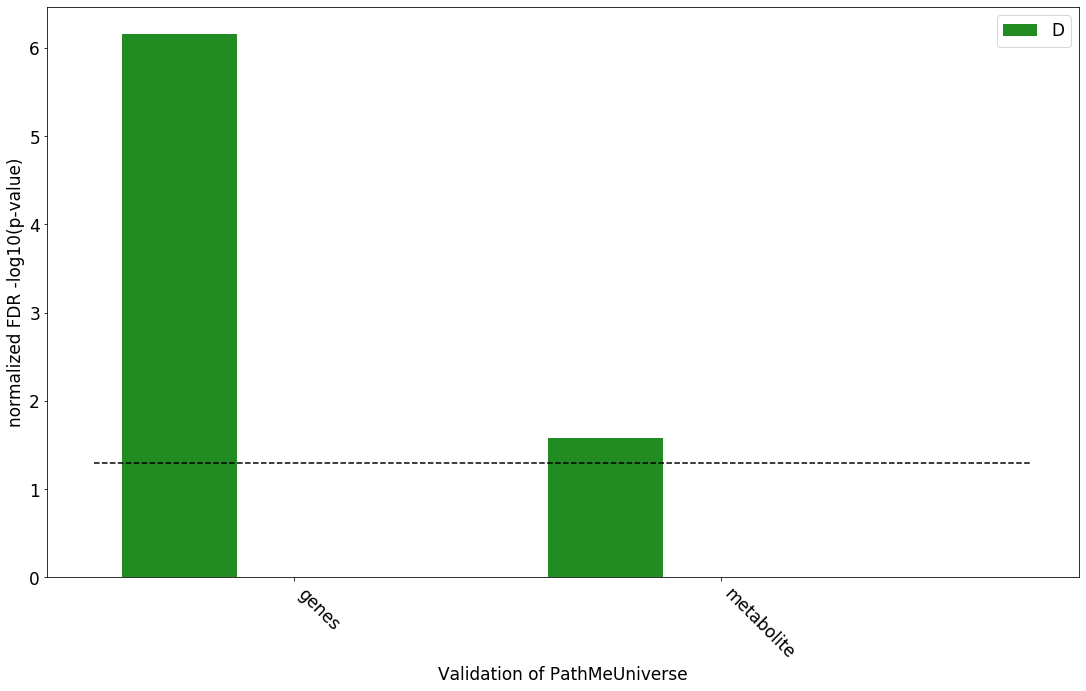

In [63]:
fdr_barchart_three_plot([(set1, subnet)], get_p_values_multiple, "Validation of PathMeUniverse")


In [11]:
entity_subnet = [i for k, v in metrics_set1_by_entity_subnet['auprc_metrics_subnet'].items() for i in v]
set1_by_entity = [i for k, v in metrics_set1_by_entity['auprc_metrics_by_entity'].items() for i in v]

In [12]:
import plotly.plotly as py
import plotly.graph_objs as go

x = ['genes', 'genes', 'genes', 'genes',
     'metabolites', 'metabolites', 'metabolites', 'metabolites'
    ]

trace0 = go.Box(
    y=entity_subnet,
    x=x,
    name='Dataset1\nPathMeUniverse subnetwork (only Metabolites or onlyGenes)\n\n',
    marker=dict(
        color='#85eabd'
    )
)
trace1 = go.Box(
    y=set1_by_entity,
    x=x,
    name='Dataset1\nPathMeUniverse\n(Metabolites + Genes + miRNAs)\n\n',
    marker=dict(
        color='#3D9970'
    )
)


data = [trace0, trace1]
layout = go.Layout(
    yaxis=dict(
        title='AUPRC',
        zeroline=False
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

/usr/local/lib/python3.7/site-packages/plotly/tools.py:1108: UserWarning:

Looks like you used a newline character: '\n'.

Plotly uses a subset of HTML escape characters
to do things like newline (<br>), bold (<b></b>),
italics (<i></i>), etc. Your newline characters 
have been converted to '<br>' so they will show 
up right on your Plotly figure!

/usr/local/lib/python3.7/site-packages/plotly/tools.py:1108: UserWarning:

Looks like you used a newline character: '\n'.

Plotly uses a subset of HTML escape characters
to do things like newline (<br>), bold (<b></b>),
italics (<i></i>), etc. Your newline characters 
have been converted to '<br>' so they will show 
up right on your Plotly figure!

/usr/local/Cellar/ipython/7.2.0/libexec/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

